# Proyek Klasifikasi Gambar: [car-vs-bike-classification-dataset ]
- **Nama:** MUHAMMAD DAFA PUTRA PRIANGGORO
- **Email:** whathappenedwithdafa@gmail.com
- **ID Dicoding:** mc009d5y0294

## Import Semua Packages/Library yang Digunakan

In [24]:
# Install tensorflowjs untuk menyimpan model sebagai tfjs
!pip install tensorflowjs

In [29]:
#installasi library yang akan digunakan
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.model_selection import train_test_split
from google.colab import files
from tensorflow.keras.preprocessing import image
import cv2
import io
from google.colab import files
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np

## Data Preparation

### Data Loading

In [3]:
#menggunakan kaggle api untuk mengambil dataset agar tidak perlu mendownload dataset
#untuk menggunakan kaggle api diperlukan kaggle.json sebbagai kunci api
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install -q kaggle
#dataset yang akan digunakan adalah dataset mobil dan motor
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset
License(s): CC0-1.0


In [4]:
#ekstaraksi file zip dataset
zip_path = '/content/car-vs-bike-classification-dataset.zip'       # Ganti dengan nama file zip kamu
extract_path = 'dataset/'      # Tujuan ekstraksi

# Cek apakah folder sudah diekstrak sebbelumnya
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset berhasil diekstrak.")
else:
    print("Folder dataset sudah ada, tidak perlu dilakukan ekstraksi.")

✅ Dataset berhasil diekstrak.


In [5]:
# mendeklarasikan variabble untuk direktori dataset
data_dir = '/content/dataset/Car-Bike-Dataset'


### Data Preprocessing

#### Split Dataset

In [8]:
#melakukan resize dataset dengan ukuran 150 x150 pixel agar dataset seragam ukurannya sebelum masuk ke model.
img_size = (150, 150)
#melakukan deklarasi untuk bbatch_size  yaitu 32 gambar sekali jalan dalam 1 batch
batch_size = 32

#spliting dan augmentasi data 80% train+val, 20% data test
datagen = ImageDataGenerator(
    rescale=1./255, # Normalisasi pixel gambar dari 0–255 menjadi 0–1
    rotation_range=20, #memutar Gambar secara acak hingga ±20 derajat.
    width_shift_range=0.2, #menggeser gambar secara horizontal hingga 20% dari lebar gambar
    height_shift_range=0.2, #menggeser gambar secara vertikal hingga 20% dari tinggi gambar
    shear_range=0.15, #melakukan distorsi perspektif pada gambar
    zoom_range=0.2, #Zoom in/out gambar secara acak hingga 20%.
    horizontal_flip=True,#membbalik gambar secara horizontal kanan -> kiri atau sebbaliknya
    fill_mode='nearest',#Saat augmentasi (misal rotasi/shift), ada ruang kosong
    validation_split=0.2  #Split dataset jadi 80% training, 20% validation
)



In [9]:
#memuat gambar dari folder dataset sebagai data latih, mengubah ukurannya ke 150x150 piksel, menerapkan augmentasi, membaginya dalam batch berisi 32 gambar,
#dan melakukan mengklasifikasikannya ke dalam beberapa kelas berdasarkan nama folder
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

#memuat 20% data dari folder dataset sebagai data validasi dengan augmentasi dan preprocessing yang sama seperti data latih.
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [10]:

# memuat data dari folder dataset untuk pengujian tanpa augmentasi, hanya dengan normalisasi pixel gambar (rescale 1./255) dan mengatur ukuran serta batch-nya
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4000 images belonging to 2 classes.


## Modelling

In [11]:
#membuat model dengan menggunakan algoritma CONV2D
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

#melakukan compile model dengan optimizer adam
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#melakukan training pada model dengan total epoch 30
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.8866 - loss: 0.2794 - val_accuracy: 0.8525 - val_loss: 0.3423
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.8974 - loss: 0.2671 - val_accuracy: 0.8575 - val_loss: 0.3245
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 272ms/step - accuracy: 0.8987 - loss: 0.2576 - val_accuracy: 0.8788 - val_loss: 0.2723
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - accuracy: 0.9042 - loss: 0.2380 - val_accuracy: 0.8737 - val_loss: 0.3112
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.9002 - loss: 0.2407 - val_accuracy: 0.8913 - val_loss: 0.2630
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - accuracy: 0.8960 - loss: 0.2428 - val_accuracy: 0.8875 - val_loss: 0.2723
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.9025 - loss: 0.2342 - val_accuracy: 0.8587 - val_loss: 0.3248
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.9032 - loss: 0

## Evaluasi dan Visualisasi

In [39]:
#melakaukan evaluasi akurasi terhadap test set
loss, accuracy = model.evaluate(test_data)
print(f"Akurasi Test Set: {accuracy * 100:.2f}%")
#melakukan  evaluasi akurasi terhadap train set
loss, accuracy = model.evaluate(train_data)
print(f"Akurasi train set: {accuracy * 100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9609 - loss: 0.0952
Akurasi Test Set: 95.72%
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.9421 - loss: 0.1680
Akurasi train set: 94.31%


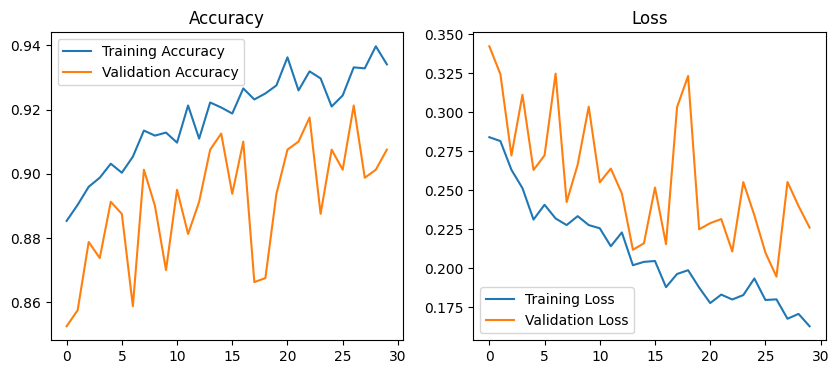

In [16]:
#visualisasi plot akurasi
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
#visualisasi plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

## Konversi Model

In [17]:
# menyimpan model model ke format .keras
model.save("model.keras")

# menyimpan model  ke format .h5
model.save("model.h5")


In [21]:
# Menyimpan model sebagai tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

os.makedirs('tflite', exist_ok=True)
with open('tflite/model.tflite', 'wb') as f:
    f.write(converter.convert())

# Membuat file label.txt
with open('tflite/labels.txt', 'w') as f:
    f.write("Car\nBike\n")

Saved artifact at '/tmp/tmpv5v6si9a'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134391435751696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391435754384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391435752656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391435755344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391407707536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391407707920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391435752848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134391407708496: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [26]:
# Menyimpan model sebagai savedmodel
tf.saved_model.save(model, 'saved_model')

In [27]:
# Menyimpan model sebagai tfjs
!tensorflowjs_converter --input_format=tf_saved_model saved_model tfjs_model

2025-04-19 09:22:40.148212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745054560.167669   11022 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745054560.173579   11022 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-19 09:22:44.310799: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745054564.311060   11022 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

## Inference (Optional)

Saving Screenshot 2025-04-19 141005.png to Screenshot 2025-04-19 141005 (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<ipython-input-40-abfefc32238f>:36: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127949 (\N{RACING MOTORCYCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


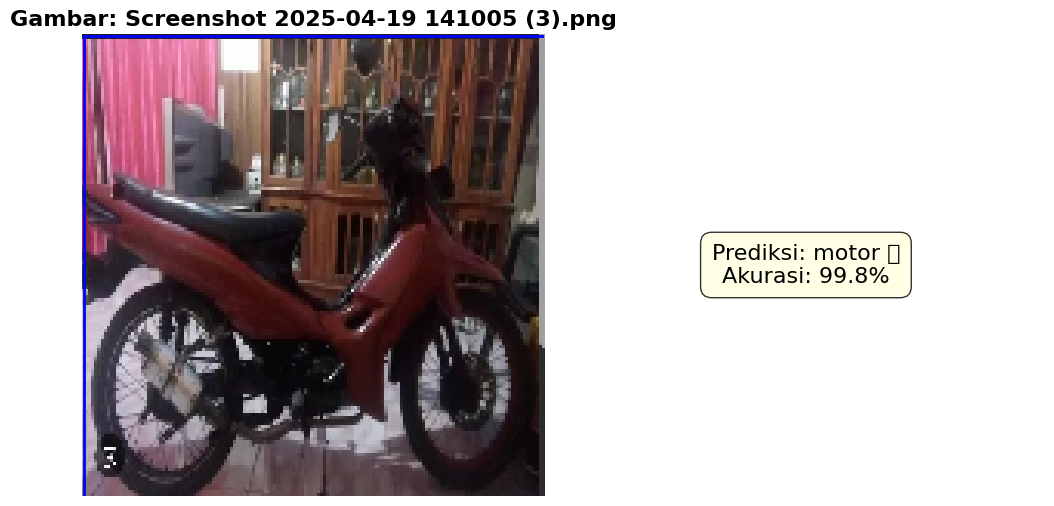


Hasil: motor 🏍️ (99.8% akurat)


In [40]:
# Unggah gambar untuk diprediksi
uploaded = files.upload()

for filename in uploaded.keys():
    # Memproses gambar
    img_bytes = uploaded[filename]
    img = image.load_img(io.BytesIO(img_bytes), target_size=(150, 150))

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    confidence = model.predict(img_array)[0][0]
    predicted_class = "motor 🏍️" if confidence > 0.5 else "mobil 🚗"
    confidence_pct = max(confidence, 1 - confidence) * 100

    # Menampilkan hasil
    plt.figure(figsize=(10, 5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Gambar: {filename}", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((0, 0), 150, 150, linewidth=2, edgecolor='blue', facecolor='none'))

    # Teks prediksi
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5,
             f"Prediksi: {predicted_class}\nAkurasi: {confidence_pct:.1f}%",
             fontsize=16,
             ha='center', va='center',
             bbox=dict(facecolor='lightyellow', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"\nHasil: {predicted_class} ({confidence_pct:.1f}% akurat)")

In [34]:
#menympan requirements.txt
!pip freeze > requirements.txt

In [35]:
!zip -r tfjs_model.zip tfjs_model

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard9of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard4of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard7of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard1of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard11of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard10of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard6of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard3of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard5of11.bin (deflated 6%)
  adding: tfjs_model/group1-shard8of11.bin (deflated 6%)
  adding: tfjs_model/model.json (deflated 86%)
  adding: tfjs_model/group1-shard2of11.bin (deflated 6%)
